# Titanic Survival Prediction
This notebook predicts survival on the Titanic dataset using a Random Forest model.

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preview the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Data Cleaning
# Fill missing Age values with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
train_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

<ipython-input-6-44914ef795dc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-6-44914ef795dc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [7]:
# Feature Engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data['IsAlone'] = (train_data['FamilySize'] == 0).astype(int)

# Convert categorical variables to numerical
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Prepare data for training
X = train_data.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.81


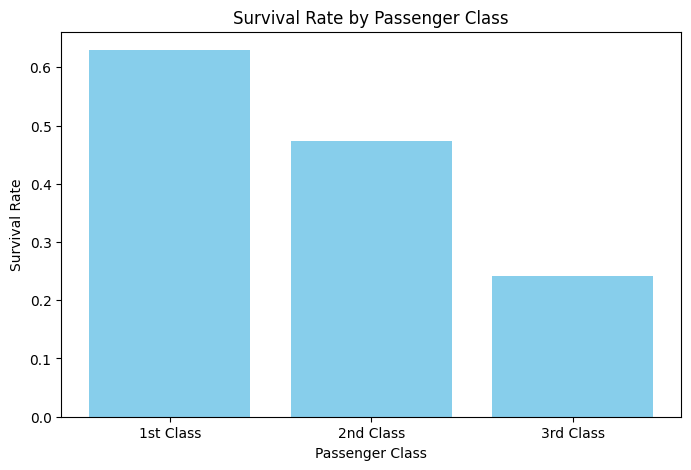

In [10]:
# Visualization 1: Bar chart of survival by Passenger Class
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8, 5))
plt.bar(survival_by_class.index, survival_by_class.values, color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[1, 2, 3], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()


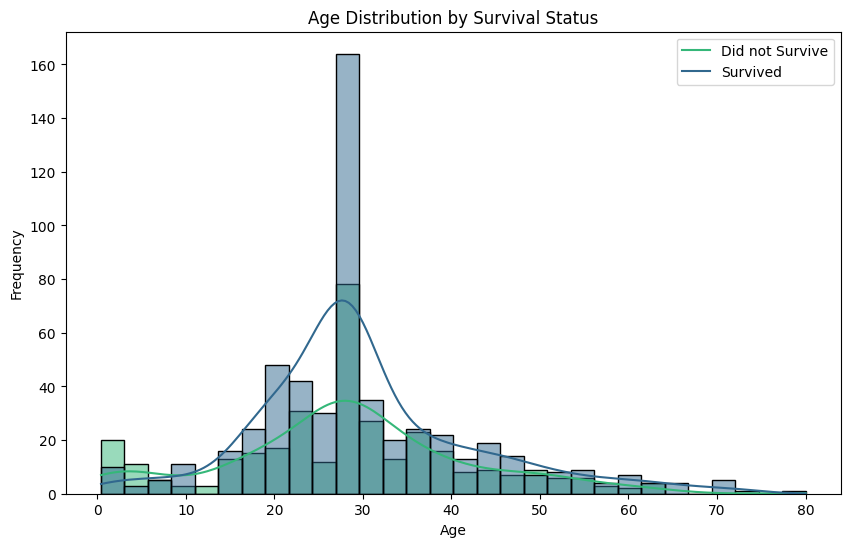

In [15]:
# Visualization 2: Histogram of Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30, palette='viridis')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Did not Survive', 'Survived'])
plt.show()
